<center style="color:darkblue;font-size:60px;padding:30px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:darkblue;font-size:40px;padding:20px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center><br><br>

<center style="font-size:20px;padding:20px"><b>
    Sinh viên thực hiện:</b><br><br>
    Nguyễn Văn Hoài Nam - 1712607<br><br>
    Phạm Công Minh - 18120058<br>
</center>

# Import

In [1]:
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

---

# Thu thập dữ liệu

## Chủ đề và nguồn của dữ liệu:
- Tập dữ liệu sử dụng là dữ liệu thông tin các phim trên trang [IMDb](https://www.imdb.com/) 
- IMDb (Internet Movie Database) là một trang web trực tuyến lưu trữ những thông tin chi tiết về bộ phim như nội dung, trailer, diễn viên, đạo diễn, nhà sản xuất... Bên cạnh những thông tin đó, IMDb còn được biết tới là nơi tổng hợp những nhận xét, đánh giá, phê bình các yếu tố như bối cảnh, kịch bản, hiệu quả hình ảnh, kỹ thuật quay... hay xếp hạng phim. IMDb có lượng người truy cập vào rất lớn và sẽ có những đánh giá, bình luận chất lượng về phim. Vậy nên, đây là một trang web có được độ tin cậy và khách quan khá cao. Căn cứ vào điểm IMDb, người ta có thể dễ dàng tìm kiếm được bộ phim được nhiều người đánh giá cao nhất theo từng thể loại và chủ đề khác nhau. Từ đó, họ sẽ có thể cân nhắc có nên bỏ tiền ra rạp xem bộ phim đó hay không.

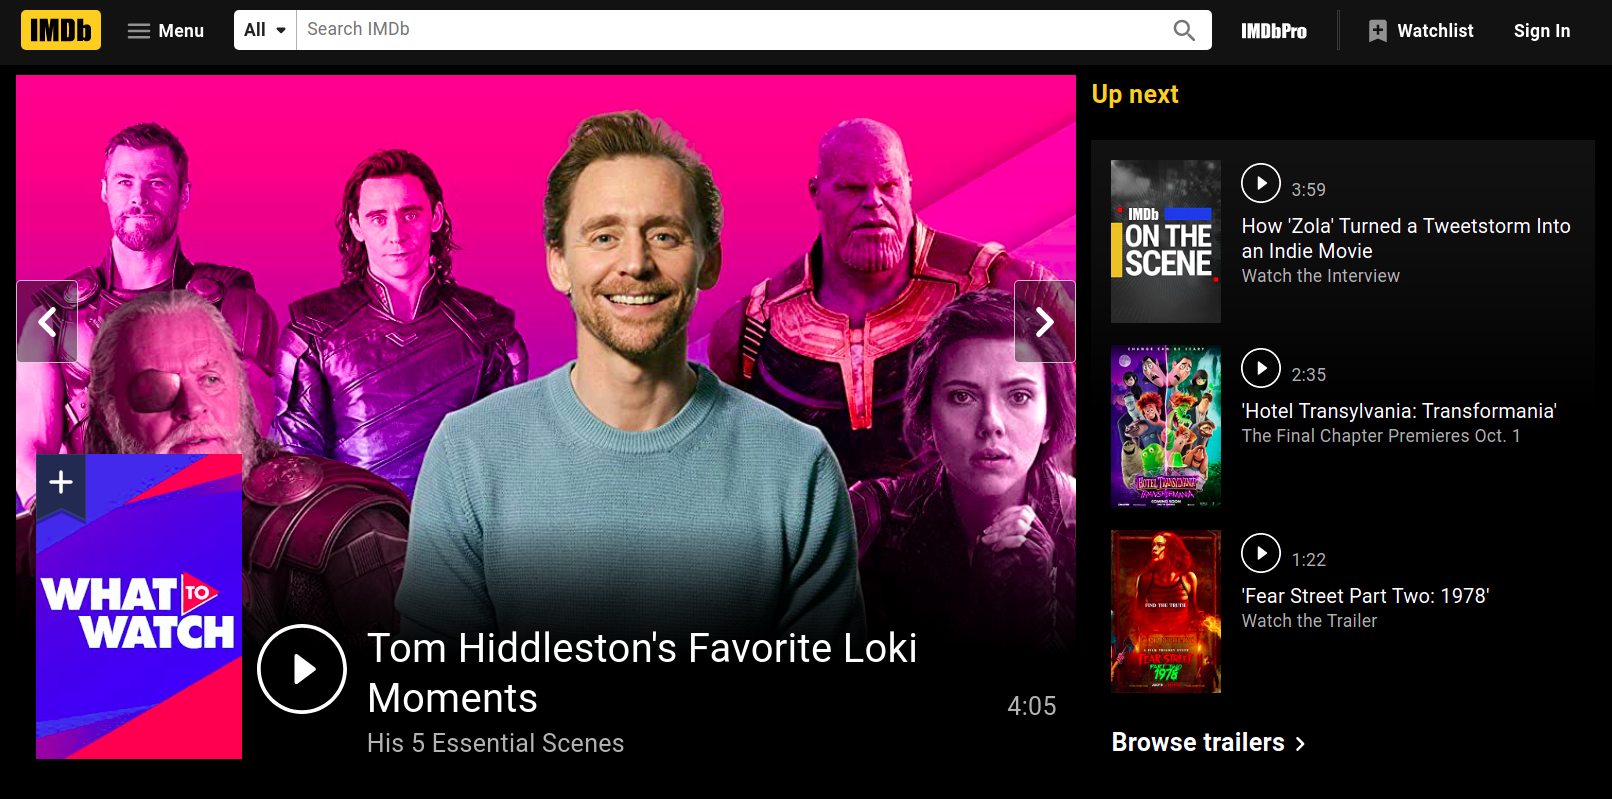

- Tập dữ liệu được lấy từ [Kaggle](https://www.kaggle.com/): [IMDb movies extensive dataset](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset). Gồm 4 file bổ sung thông tin cho nhau, trong bài này chỉ sử  2 file là `IMDb movies.csv` và `IMDb ratings.csv`

## Dữ liệu này có được phép sử dụng không?
- License: CC0 - Public Domain => Có thể sử dụng dữ liệu này

## Người ta thu thập dữ liệu như thế nào?
- Dữ liệu được trích xuất (web scraping) từ trang wed [IMDb](https://www.imdb.com/)
- Các phim được thu thập là các phim có trên 100 vote (tính từ ngày 01/01/2020)

---

# Khám phá dữ liệu & tiền xử lý dữ liệu

## Đọc dữ liệu

In [2]:
movies_df = pd.read_csv('./data/IMDb movies.csv')
movies_df.head(2)

/home/wiuy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [3]:
ratings_df = pd.read_csv('./data/IMDb ratings.csv')
movies_df.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
movies_df.shape

(85855, 22)

- Dữ liệu về phim trong **movies_df** có 85855 dòng và 22 cột  

In [5]:
ratings_df.shape

(85855, 49)

- Dữ liệu điểm bình chọn trong **ratings_df** có 85855 dòng và 49 cột  

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
- Mỗi dòng trong **movies_df** là thông tin của một bộ phim trên trang IMDb
- Mỗi dòng trong **ratings_df** là điểm đánh giá chi tiết của một bộ phim trên trang IMDb  

## Dữ liệu có các dòng bị lặp không?

In [6]:
ratings_df.duplicated().any()

False

In [7]:
movies_df.duplicated().any()

False

- Cả 2 dữ liệu đều không có dòng bị lặp

## Mỗi cột có ý nghĩa gì?

### ratings_df

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***imdb_title_id*** | mã định danh của tựa đề phim|
| ***weighted_average_vote*** | điểm sau khi tính theo trung bình trọng số|
| ***total_votes*** | số lượng bình chọn|
| ***mean_vote*** | điểm bình chọn trung bình
| ***median_vote*** | điểm bình chọn trung vị
| ***votes_10*** | số lượng bình chọn điểm 10|
| ***votes_9*** | số lượng bình chọn điểm 9|
| ***votes_8*** | số lượng bình chọn điểm 8|
| ***votes_7*** | số lượng bình chọn điểm 7|
| ***votes_6*** | số lượng bình chọn điểm 6|
| ***votes_5*** | số lượng bình chọn điểm 5|
| ***votes_4*** | số lượng bình chọn điểm 4|
| ***votes_3*** | số lượng bình chọn điểm 3|
| ***votes_2*** | số lượng bình chọn điểm 2|
| ***votes_1*** | số lượng bình chọn điểm 1|
| ***allgenders_0age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng dưới 18 tuổi|
| ***allgenders_0age_votes*** | số lượng bình chọn của người dùng dưới 18 tuổi|
| ***allgenders_18age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng 18-30 tuổi|
| ***allgenders_18age_votes*** | số lượng bình chọn của người dùng 18-30 tuổi|
| ***allgenders_30age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng 30-45 tuổi|
| ***allgenders_30age_votes*** | số lượng bình chọn của người dùng 30-45 tuổi|
| ***allgenders_45age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng trên 45 tuổi|
| ***allgenders_45age_votes*** | số lượng bình chọn của người dùng trên 45 tuổi|
| ***males_allages_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam|
| ***males_allages_votes*** | số lượng bình chọn của tất cả người dùng nam|
| ***males_0age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam dưới 18 tuổi|
| ***males_0age_votes*** | số lượng bình chọn của tất cả người dùng nam dưới 18 tuổi|
| ***males_18age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam 18-30 tuổi|
| ***males_18age_votes*** | số lượng bình chọn của tất cả người dùng nam 18-30 tuổi|
| ***males_30age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam 30-45 tuổi|
| ***males_30age_votes*** | số lượng bình chọn của tất cả người dùng nam 30-45 tuổi|
| ***males_45age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam trên 45 tuổi|
| ***males_45age_votes*** | số lượng bình chọn của tất cả người dùng nam trên 45 tuổi|
| ***females_allages_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nữ|
| ***females_allages_votes*** | số lượng bình chọn của tất cả người dùng nữ|
| ***females_0age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam dưới 18 tuổi|
| ***females_0age_votes*** | số lượng bình chọn của tất cả người dùng nam dưới 18 tuổi|
| ***females_18age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam 18-30 tuổi|
| ***females_18age_votes*** | số lượng bình chọn của tất cả người dùng nam 18-30 tuổi|
| ***females_30age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam 30-45 tuổi|
| ***females_30age_votes*** | số lượng bình chọn của tất cả người dùng nam 30-45 tuổi|
| ***females_45age_avg_vote*** | điểm bình chọn trung bình của tất cả người dùng nam trên 45 tuổi|
| ***females_45age_votes*** | số lượng bình chọn của tất cả người dùng nam trên 45 tuổi|
| ***top1000_voters_rating*** |  |
| ***top1000_voters_votes*** |  |
| ***us_voters_rating*** | điểm bình chọn trung bình của những người dùng từ Mỹ|
| ***us_voters_votes*** | số lượng bình chọn của những người dùng từ Mỹ|
| ***non_us_voters_rating*** | điểm bình chọn trung bình của những người dùng không đến từ Mỹ|
| ***non_us_voters_votes*** | số lượng bình chọn của những người dùng không đến từ Mỹ|

### movies_df

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***imdb_title_id*** | ID phim trên trang IMDb |
| ***title*** | tên phim |
| ***original_title*** | tên gốc của phim |
| ***year*** | năm phát hành (4 chữ số) |
| ***date_published*** | ngày phát hành |
| ***genre*** | thể loại phim (1 phim có thể thuộc nhiều thể loại) |
| ***duration*** | thời lượng phim (phút)|
| ***country*** | quốc gia của phim |
| ***language*** | ngôn ngữ sử dụng trong phim |
| ***director*** | tên đạo diễn |
| ***writer*** | tên biên kịch |
| ***production_company*** | tên công ty sản xuất |
| ***actors*** | diễn viên |
| ***description*** | mô tả phim |
| ***avg_vote*** | điểm đánh giá trung bình (thang 10) |
| ***votes*** | số lượng đánh giá |
| ***budget*** | kinh phí làm phim (đơn vị tiền tệ không đồng nhất) |
| ***usa_gross_income*** | tổng doanh thu tại Mỹ (đô la Mỹ) |
| ***worlwide_gross_income*** | tổng doanh thu trên toàn thế giới (đô la Mỹ) |
| ***metascore*** $^{(*)}$ | đánh giá của những người có chuyên môn (thang 100) |
| ***reviews_from_users*** | số lượng review từ người dùng |
| ***reviews_from_critics*** | số lượng review từ nhà phê bình |

(\*): ***metascore*** lấy từ trang https://www.metacritic.com/, 2 cột ***reviews_from_users*** và ***reviews_from_critics*** sẽ ứng với các review trên trang này

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
movies_df.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

**Dựa vào mô tả thì có các cột cần có sự điều chỉnh về kiểu dữ liệu:**
- Các cột ***year, budget, usa_gross_income, worlwide_gross_income*** nên được đưa về các kiểu `numeric`.
- Cột ***date_published*** cần được đưa về kiểu `datetime`

In [9]:
ratings_df.dtypes

imdb_title_id                 object
weighted_average_vote        float64
total_votes                    int64
mean_vote                    float64
median_vote                  float64
votes_10                       int64
votes_9                        int64
votes_8                        int64
votes_7                        int64
votes_6                        int64
votes_5                        int64
votes_4                        int64
votes_3                        int64
votes_2                        int64
votes_1                        int64
allgenders_0age_avg_vote     float64
allgenders_0age_votes        float64
allgenders_18age_avg_vote    float64
allgenders_18age_votes       float64
allgenders_30age_avg_vote    float64
allgenders_30age_votes       float64
allgenders_45age_avg_vote    float64
allgenders_45age_votes       float64
males_allages_avg_vote       float64
males_allages_votes          float64
males_0age_avg_vote          float64
males_0age_votes             float64
m

- Cột ***imdb_title_id*** đang ở dạng `object`, các phần tử đều ở dạng chuỗi dạng chuỗi nên không cần xử lý
- Các cột số lượng đang ở kiểu số thực `float64`, đúng hơn là nên ở dạng số nguyên `int`. Nhưng đây là do dữ liệu của tác giả để kiểu số thực, việc ép kiểu về số nguyên có thể gây mất mát dữ liệu. Đó các cột: ***allgenders_18age_votes, allgenders_30age_votes, allgenders_45age_votes, males_allages_votes, males_18age_votes, males_30age_votes, males_45age_votes, females_allages_votes, females_18age_votes, females_30age_votes, females_45age_votes, us_voters_votes, non_us_voters_votes***.

## Số-lượng/tỉ-lệ các giá trị thiếu?

- Vì nhìn qua thì có các cột bị thiếu rất nhiều nên cần kiểm tra để loại bỏ nếu không thực sự cần thiết

In [10]:
def missing_ratio(s):
    return s.isnull().mean() * 100

movies_df.agg(missing_ratio)

imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.074544
language                  0.970241
director                  0.101334
writer                    1.830994
production_company        5.188981
actors                    0.080368
description               2.463456
avg_vote                  0.000000
votes                     0.000000
budget                   72.383670
usa_gross_income         82.148972
worlwide_gross_income    63.873974
metascore                84.502941
reviews_from_users        8.848640
reviews_from_critics     13.740609
dtype: float64

In [11]:
ratings_df.agg(missing_ratio)

imdb_title_id                 0.000000
weighted_average_vote         0.000000
total_votes                   0.000000
mean_vote                     0.000000
median_vote                   0.000000
votes_10                      0.000000
votes_9                       0.000000
votes_8                       0.000000
votes_7                       0.000000
votes_6                       0.000000
votes_5                       0.000000
votes_4                       0.000000
votes_3                       0.000000
votes_2                       0.000000
votes_1                       0.000000
allgenders_0age_avg_vote     61.144954
allgenders_0age_votes        61.144954
allgenders_18age_avg_vote     0.822317
allgenders_18age_votes        0.822317
allgenders_30age_avg_vote     0.011648
allgenders_30age_votes        0.011648
allgenders_45age_avg_vote     0.093180
allgenders_45age_votes        0.093180
males_allages_avg_vote        0.001165
males_allages_votes           0.001165
males_0age_avg_vote      

## Tiền xử lý bỏ cột có giá trị thiếu nhiều và bỏ cột chúng tôi không hiểu rõ ý nghĩa
### movies_df
- Bỏ đi các cột thiếu hơn 50% dữ liệu: ***budget, usa_gross_income, worlwide_gross_income, metascore***
- Do bỏ cột ***metascore*** nên sẽ bỏ luôn hai cột bổ sung thông tin cho cột này là: ***reviews_from_users, reviews_from_critics***

### ratings_df
- Bỏ đi các cột thiếu hơn 50% dữ liệu: ***allgenders_0age_avg_vote, allgenders_0age_votes, males_0age_avg_vote, males_0age_votes, females_0age_avg_vote, females_0age_votes***
- Bỏ cột chúng tôi không hiểu rõ ý nghĩa: ***top1000_voters_rating, top1000_voters_votes***

In [12]:
movies_df = movies_df.drop(columns=['budget', 
                                    'usa_gross_income', 
                                    'worlwide_gross_income', 
                                    'metascore', 
                                    'reviews_from_users', 
                                    'reviews_from_critics'])

In [13]:
ratings_df.drop(columns=['allgenders_0age_avg_vote', 
                         'allgenders_0age_votes', 
                         'males_0age_avg_vote', 
                         'males_0age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes'], inplace=True)

## Điều chỉnh kiểu dữ liệu cho phù hợp cho các cột
### chỉ có movies_df là cần diều chỉnh

- Do đã bỏ đi một số cột nên còn lại 2 cột ***year*** và ***date_published*** là cần điều chỉnh

**Điều chỉnh cột year:**
- Có một warning khi đọc dữ liệu là cột ***year*** có kiểu dữ liệu hỗn hợp nên trước tiên sẽ là kiểm tra xem cột ***year*** có các kiểu dữ liệu gì

In [14]:
set(movies_df.year.apply(type))

{int, str}

- Ngoài kiểu `int` là hợp lý ***year*** thì còn kiểu `str` cần phải chỉnh sửa, sao khi thử chuyển thì báo lỗi

`Unable to parse string "TV Movie 2019" at position 83917`

- Nên xóa dòng mà cột ***year*** nhận giá trị "TV Movie 2019" rồi mới chuyển về dạng `numeric`

In [15]:
movies_df = movies_df[movies_df.date_published != 'TV Movie 2019']
movies_df.year = pd.to_numeric(movies_df.year)
movies_df.year.dtypes

dtype('int64')

**Điều chỉnh cột *date_published* về dạng `datetime`**

- Trước khi điều chỉnh kiểu dữ liệu thì có một vấn đề cần xử lý với cột ***date_published*** đó là có các giá trị chỉ có năm không có ngày tháng 

In [16]:
movies_df.date_published[movies_df.date_published.apply(lambda x: '-' not in str(x))].head()

5      1913
55     1915
100    1919
117    1919
144    1922
Name: date_published, dtype: object

- Bỏ các cột này trước khi chuyển về dạng `datetime`, mặc dù không bỏ thì việc chuyển vẫn không có vấn đề tuy nhiên ngày tháng sẽ mặc định là 1/1 điều này sẽ gây sai lệch nếu ta muốn khảo sát mà có sử dụng cột này.

In [17]:
movies_df = movies_df[movies_df.date_published.apply(lambda x: '-' in str(x))]

- Chuyển cột ***date_published*** về dạng `datetime`

In [18]:
movies_df.date_published = pd.to_datetime(movies_df.date_published, format='%Y-%m-%d')

In [19]:
movies_df.date_published.dtypes

dtype('<M8[ns]')

- Theo mô tả dữ liệu thì cột ***year*** phải trùng với năm ở cột ***date_published***, kiểm tra thực điều này có thực sự đúng

In [20]:
sum(movies_df.year != movies_df.date_published.dt.year)

17054

*Sai lệch rất nhiều,không biết vì sao lại có sự sai lệch này. Với sự sai lệch nhiều đến vậy thì có lẽ không phải do vấn đề nhập liệu*

- Vậy sẽ xóa cột ***year***

In [21]:
movies_df = movies_df.drop(columns=['year'])

## Xem lại dữ liệu sau khi đã xóa cột và điều chỉnh kiểu dữ liệu

**Số dòng số cột của dữ liệu**

In [22]:
movies_df.shape

(81292, 15)

In [23]:
ratings_df.shape

(85855, 41)

**Xem lại kiểu dữ liệu của các cột**

In [24]:
movies_df.dtypes

imdb_title_id                 object
title                         object
original_title                object
date_published        datetime64[ns]
genre                         object
duration                       int64
country                       object
language                      object
director                      object
writer                        object
production_company            object
actors                        object
description                   object
avg_vote                     float64
votes                          int64
dtype: object

In [25]:
ratings_df.dtypes

imdb_title_id                 object
weighted_average_vote        float64
total_votes                    int64
mean_vote                    float64
median_vote                  float64
votes_10                       int64
votes_9                        int64
votes_8                        int64
votes_7                        int64
votes_6                        int64
votes_5                        int64
votes_4                        int64
votes_3                        int64
votes_2                        int64
votes_1                        int64
allgenders_18age_avg_vote    float64
allgenders_18age_votes       float64
allgenders_30age_avg_vote    float64
allgenders_30age_votes       float64
allgenders_45age_avg_vote    float64
allgenders_45age_votes       float64
males_allages_avg_vote       float64
males_allages_votes          float64
males_18age_avg_vote         float64
males_18age_votes            float64
males_30age_avg_vote         float64
males_30age_votes            float64
m

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [26]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

### movies_df
**Các giá trị min max và tỷ lệ giá trị thiếu của các cột dạng numeric**

In [27]:
num_cols = ['date_published', 'duration', 'avg_vote', 'votes']
movies_df[num_cols].agg([min, max, missing_ratio])

,date_published,duration,avg_vote,votes
min,1894-10-09 00:00:00,41.0,1.0,99.0
max,2021-05-07 00:00:00,808.0,9.9,2278845.0
missing_ratio,0,0.0,0.0,0.0


- Các cột dạng numeric không có dữ liệu thiếu
- Tiếp theo sẽ xem thử sự phân bố giá trị của các cột này, cột ***date_published*** là kiểu `datetime` nên ta không xem xét sự phân bố dữ liệu

**Phân bố giá trị của cột year**

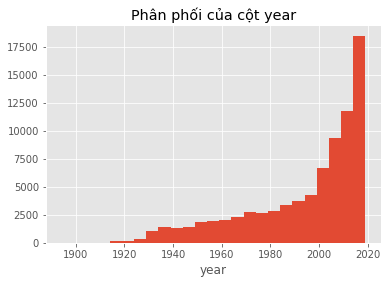

In [28]:
movies_df['date_published'].dt.year.hist(bins=np.arange(1894, 2022, 5))
plt.xlabel('year')
plt.title('Phân phối của cột year')
plt.show()

*Nhận xét: số lượng phim luôn tăng qua các năm và có xu hướng tăng mạnh hơn qua từng năm. Và năm 2021 tất nhiên sẽ có rất ít phim*

**Phân bố giá trị của cột duration**

Các giá trị trên 200 là quá ít nên bin cuối là 200

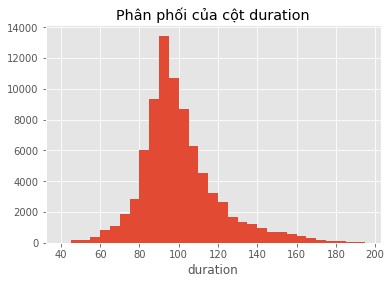

In [29]:
movies_df['duration'].hist(bins=np.arange(40, 200, 5))
plt.xlabel('duration')
plt.title('Phân phối của cột duration')
plt.show()

*Nhận xét: thời lượng các bộ phim chủ yếu trong khoảng từ 80-120 phút*

**Phân bố giá trị của cột avg_vote**

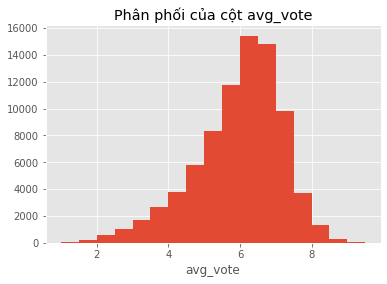

In [30]:
movies_df['avg_vote'].hist(bins=np.arange(1, 10, 0.5))
plt.xlabel('avg_vote')
plt.title('Phân phối của cột avg_vote')
plt.show()

*Nhận xét: đa số các phim được đánh giá ở mức 5-7, rất ít phim có thể đạt được 9-10 (không có phim nào đạt được đánh gái 10 tuyệt đối)*

**Phân bố giá trị của cột votes**

Các giá trị trên 6000 là quá ít nên bin cuối là 6000

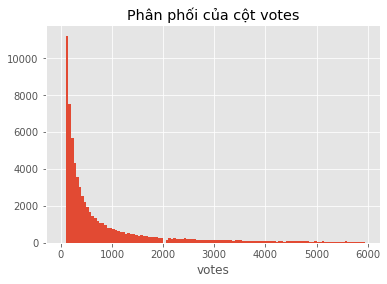

In [31]:
movies_df['votes'].hist(bins=np.arange(0, 6000, 50))
plt.xlabel('votes')
plt.title('Phân phối của cột votes')
plt.show()

### ratings_df
**Các giá trị min max và tỷ lệ giá trị thiếu của các cột dạng numeric**

In [32]:
ratings_df[1:].agg([missing_ratio, min, max])

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
missing_ratio,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822326,0.822326,0.011648,0.011648,0.093181,0.093181,0.001165,1.164768e-03,1.706385,1.706385,0.013977,0.013977,0.117642,0.117642,0.094346,0.094346,7.595453,7.595453,1.099541,1.099541,3.259021,3.259021,0.243437,0.243437,0.001165,0.001165
min,tt0000574,1.0,99.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,tt9914942,9.9,2278845.0,9.8,10.0,1259076.0,629582.0,418070.0,241832.0,145740.0,78385.0,45219.0,37644.0,32101.0,68500.0,10.000000,522182.000000,10.000000,879620.000000,10.000000,204278.000000,10.000000,1.409165e+06,10.000000,422587.000000,10.000000,743676.000000,10.000000,165852.000000,10.000000,278964.000000,10.000000,107833.000000,10.000000,129249.000000,10.000000,34317.000000,10.000000,348363.000000,10.000000,887226.000000


**Phân bố giá trị của các cột vote**

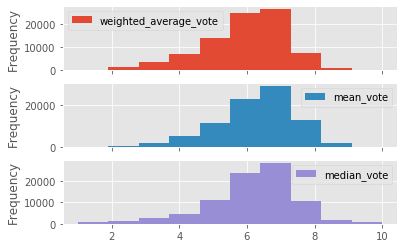

In [33]:
list_col = ['weighted_average_vote', 'mean_vote', 'median_vote']
ratings_df[list_col].plot(kind='hist', subplots=True);

**Phân bố giá trị của cột vote theo độ tuổi**

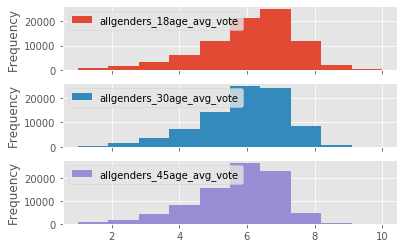

In [34]:
list_col = ['allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True);

**Phân bố giá trị của cột vote độ tuổi của nam**

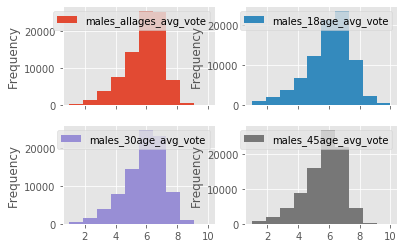

In [35]:
list_col = ['males_allages_avg_vote', 'males_18age_avg_vote', 'males_30age_avg_vote', 'males_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True, layout=(2,2));

**Phân bố giá trị của cột vote theo độ tuổi của nữ**

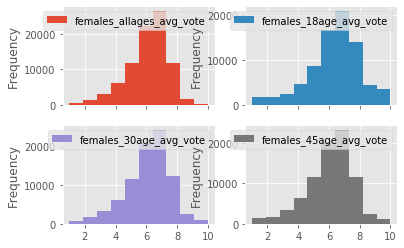

In [36]:
list_col = ['females_allages_avg_vote', 'females_18age_avg_vote', 'females_30age_avg_vote', 'females_45age_avg_vote']
ratings_df[list_col].plot(kind='hist', subplots=True, layout=(2,2));

**Phân bố giá trị của cột us_voters_rating và non_us_voters_rating**

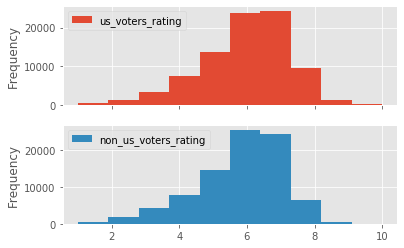

In [37]:
list_col = ['us_voters_rating', 'non_us_voters_rating']
ratings_df[list_col].plot(kind='hist', subplots=True);

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
### ratings_df
- Cột imdb_title_id dạng phân loại đây là cột dùng để phân biệt cho từng phim nên không cần xem xét phân bố

In [38]:
ratings_df['imdb_title_id'].nunique()

85855

### movies_df
- Đầu tiên xem xét các giá trị sau của các cột categorical: tỷ lệ giá trị thiếu, số lượng các giá trị phân biệt (`num_diff_vals`), các gái trị phân biệt (`diff_vals`)

In [39]:
cate_cols = list(set(movies_df.columns) - set(num_cols))
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

movies_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

,original_title,writer,director,production_company,imdb_title_id,description,genre,title,language,country,actors
missing_ratio,0,1.63116,0.0984107,4.54288,0,2.30527,0,0,0.943512,0.0713477,0.0725779
num_diff_vals,76680,63954,33272,30598,81292,79296,1234,77845,4299,4826,81179
diff_vals,"[Miss Jerry, The Story of the Kelly Gang, Den ...","[Alexander Black, Charles Tait, Urban Gad, Geb...","[Alexander Black, Charles Tait, Urban Gad, Cha...","[Alexander Black Photoplays, J. and N. Tait, F...","[tt0000009, tt0000574, tt0001892, tt0002101, t...",[The adventures of a female reporter in the 18...,"[Romance, Biography, Crime, Drama, Drama, Dram...","[Miss Jerry, The Story of the Kelly Gang, Den ...","[None, nan, English, Italian, German, Danish, ...","[USA, Australia, Germany, Denmark, Italy, Germ...","[Blanche Bayliss, William Courtenay, Chauncey ..."


*Cột imdb_title_id có số lượng giá trị khác nhau đúng với số dòng dữ liệu: 85854 dòng*

- Tiếp theo tìm các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language, actors, director, writer***.
- Do mỗi mẫu của các cột này có thể có nhiều giá trị nên cần phải xử lý tách các giá trị này ra trước rồi mới tính tần xuất của từng giá trị. Hàm `count_list_cols` sẽ thực hiện việc tách và sau đó tính tần xuất bằng phương thức `value_counts`

In [40]:
def count_list_cols(s):
    return s.str.replace(' ', '').str.split(',').explode().value_counts()
def top_vals(s, n):
    freq = count_list_cols(s)
    return list(freq[:n].index)

movies_df[['genre', 'production_company', 'country', 'language', 'actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

genre                        [Drama, Comedy, Romance, Action, Thriller]
production_company    [Metro-Goldwyn-Mayer(MGM), WarnerBros., Columb...
country                                 [USA, France, UK, India, Italy]
language                    [English, French, Spanish, Italian, German]
actors                [Brahmanandam, AnupamKher, EricRoberts, Nassar...
director              [MichaelCurtiz, JesúsFranco, LesleySelander, R...
writer                [JingWong, KuangNi, WilliamShakespeare, JesúsF...
dtype: object

- Trực quan tần xuất của các giá trị xuất hiện nhiều nhất của các cột ***genre, production_company, country, language***

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

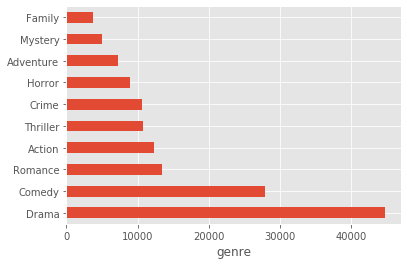

In [41]:
count_list_cols(movies_df.genre)[:10].plot.barh()
plt.xlabel('genre')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột production_company**

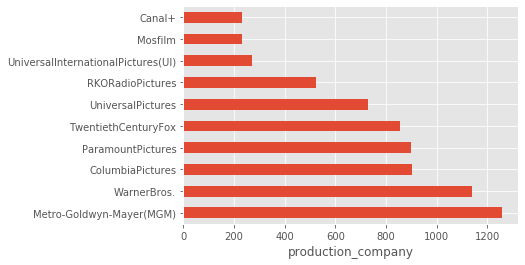

In [42]:
count_list_cols(movies_df.production_company)[:10].plot.barh()
plt.xlabel('production_company')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột country**

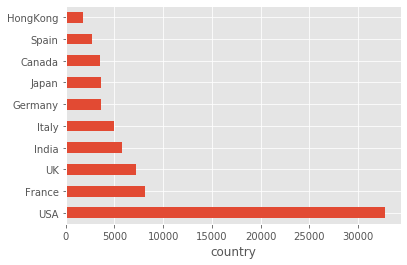

In [43]:
count_list_cols(movies_df.country)[:10].plot.barh()
plt.xlabel('country')
plt.show()

**Tần xuất của 10 giá trị xuất hiện nhiều nhất của cột genre**

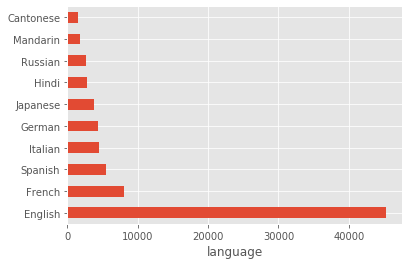

In [44]:
count_list_cols(movies_df.language)[:10].plot.barh()
plt.xlabel('language')
plt.show()

*Tần xuất của giá trị **USA** trong cột **country** và **English** trong cột **languge** vượt trội hoàn toàn so với các giá trị còn lại, điều này không quá bất ngờ đối với ngành công nghiệp phim ảnh*

- Xem thử với các phim tiếng Anh (không cần xét USA vì phim ở USA sẽ bao gồm trong phim tiếng Anh) thì các giá trị xuất hiện nhiều nhất của các cột ***actors, director, writer*** sẽ như thế nào.
- Tạo `Eng_df` gồm các phim tiếng Anh (có thể có các thứ tiếng khác) để sử dụng cho các phần sau

In [45]:
Eng_df = movies_df[movies_df.language.apply(lambda x: 'English' in str(x))]

In [46]:
Eng_df[['actors', 'director', 'writer']].agg(lambda s: top_vals(s, 5))

actors      [EricRoberts, JohnCarradine, HenryO'Neill, Mic...
director    [MichaelCurtiz, LesleySelander, RichardThorpe,...
writer      [WilliamShakespeare, RobertE.Kent, BenHecht, W...
dtype: object

*Các phim tiếng Anh mặt dù chiếm đa số nhưng không vì vậy mà các giá trị **actors, director, writer** của các phim tiếng Anh sẽ chiếm đa số theo*

---

# Xác định các câu hỏi

## Câu hỏi là gì?
**Câu 1**: Đạo diễn, diễn viên nào có nhiều phim rating cao nhất
- Top 10 đạo diễn và diễn viên phổ biến nhất trong những phim có điểm bình chọn từ 7 trở lên
- Top 10 đạo diễn và diễn viên có điểm bình chọn trung bình cao trong tất cả những phim họ thực hiện và có điểm bình chọn từ 7 trở lên từ người bình chọn là nam từ 18-30
- Top 10 đạo diễn và diễn viên có điểm bình chọn trung bình cao trong những phim thể loại tình cảm họ thực hiện và có điểm bình chọn từ 7 trở lên từ người bình chọn là nữ từ 18-30

$*$ Người thực hiện: **Nam**

**Câu 2**: Phân tích sự thay đổi của các bộ phim (trend của các bộ phim) theo thời gian trong năm:
- Sự biến động về số lượng phim được phát hành theo tháng? Khoảng thời gian nào trong năm là có nhiều/ít phim được phát hành nhất?
- Thời gian ra mắt phim có mối quan hệ với chất lượng của phim không?

$*$ Người thực hiện: **Minh**

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?
**Câu 1**: Dựa vào thông tin đạo diễn (hoặc diễn viên) để xem được nhiều phim hay từ đạo diễn (hoặc diễn viên) này hơn

**Câu 2:**
- Về phía người xem phim: Dựa vào câu trả lời sẽ có thể lên kế hoạch sắp xếp thời gian để thuận lợi cho việc xem phim vào các tháng có nhiều phim và các tháng có các phim hay
- Về phía nhà sản xuất: Câu trả lời thu được sẽ là bước đầu để làm thêm các khảo sát, nghiên cứu để tìm ra thời gian thích hợp để ra mắt phim. Ví dụ như dựa nghiên cứu thêm khoảng thời gian đó có lợi gì mà lại có nhiều phim ra mắt, liệu những lợi ích đó có phù hợp với công ty mình để cũng mắt vào khoảng thời gian đó hay lại lựa chọn khoảng thời gian khác để tránh cạnh tranh

---

# Phân tích để trả lời

## Câu 1
Hướng tới việc tìm đạo diễn và diễn viên.  
`IMDb movies.csv` không có thông tin về giới tính đạo diễn hay diễn viên nên sẽ không chia nhỏ thêm nữa thông tin về đạo diễn và diễn viên.
Chúng ta dựa vào thông tin bình chọn (ratings) để tìm đạo diễn hay diễn viên nào ấn tượng.  
Rất may là dữ liệu `IMDb ratings.csv` chia ra rất trường về giới tính, độ tuổi người bình chọn nên sẽ là thông tin khá hữu ích.  
Chúng ta sẽ sử dụng thông tin từ hai dữ liệu `IMDb movies.csv`, `IMDb ratings.csv` để trả lời câu hỏi.

In [47]:
# Merge 2 bảng liệu phim và bình chọn
# Số lượng vote phải hơn 2000 để tránh những phim spam đánh giá
df1 = movies_df[movies_df.votes >= 2000]

# Lọc ra những phim có ngôn ngữ là English hoặc nơi sản xuất có USA
# Vì ít nhất phim này có thể có phụ đề Tiếng Anh để có thể xem được
df1 = df1[df1.language.str.contains('English') | df1.country.str.contains('USA')]

# Chọn ra những cột có thông tin thú vị
df1 = df1[['imdb_title_id',
           'original_title',
           'genre',
           'director',
           'writer',
           'actors']]

df2 = ratings_df[ratings_df.total_votes >= 2000]
df2 = df2[['imdb_title_id',
           'weighted_average_vote',
           'allgenders_18age_avg_vote',
           'males_allages_avg_vote',
           'males_18age_avg_vote',
           'females_allages_avg_vote',
           'females_18age_avg_vote']]

movies_ratings_df = pd.merge(df1, df2, on='imdb_title_id')
movies_ratings_df.head(2)

,imdb_title_id,original_title,genre,director,writer,actors,weighted_average_vote,allgenders_18age_avg_vote,males_allages_avg_vote,males_18age_avg_vote,females_allages_avg_vote,females_18age_avg_vote
0,tt0004707,Tillie's Punctured Romance,Comedy,"Mack Sennett, Charles Bennett",NaN,"Marie Dressler, Charles Chaplin, Mabel Normand...",6.3,6.3,6.3,6.3,6.6,6.4
1,tt0004972,The Birth of a Nation,"Drama, History, War",D.W. Griffith,"Thomas Dixon Jr., Thomas Dixon Jr.","Henry B. Walthall, Lillian Gish, Mae Marsh, Mi...",6.3,6.0,6.4,6.1,5.7,5.4


In [48]:
# Hàm để lấy ra cột điểm bình chọn mong muốn với ngưỡng tùy chọn (mặc định là 7.0 điểm bình chọn)
# ngoài ra còn tiền xử lý cột đạo diễn và diễn viên từ chuỗi thành list
def movie_by_vote(movies_ratings_df, rating_col, threshold=7.0):
    df = movies_ratings_df.copy()
    df = df[df[rating_col] >= threshold]
    df['director'] = df['director'].str.split(',')
    df['actors'] = df['actors'].str.replace(' ', '').str.split(',')
    return df

### Top 10 đạo diễn và diễn viên phổ biến nhất trong những phim có điểm bình chọn từ 7 trở lên
Chúng ta tìm thông tin tên của đạo diễn (hoặc diễn viên) mà những phim họ làm (hoặc đóng) có nhiều điểm bình chọn cao (chỉ tính điểm từ 7).  
Mục đích để dễ dàng kiếm được những phim hay mà mọi người ở mọi giới tính và lứa tuổi đánh giá cao để xem.

In [49]:
df3 = movie_by_vote(movies_ratings_df, 'weighted_average_vote')
df3.explode('director')['director'].value_counts()[:10]

Alfred Hitchcock    28
Woody Allen         26
Steven Spielberg    23
John Ford           23
William Wyler       22
Billy Wilder        21
Martin Scorsese     21
Michael Curtiz      20
Clint Eastwood      20
Howard Hawks        18
Name: director, dtype: int64

In [50]:
df3.explode('actors')['actors'].value_counts()[:10]

BetteDavis         37
HumphreyBogart     35
MichaelCaine       34
RobertDeNiro       31
JamesStewart       30
BurtLancaster      29
SamuelL.Jackson    28
CaryGrant          28
JohnWayne          28
HenryFonda         27
Name: actors, dtype: int64

### Top 10 đạo diễn và diễn viên có điểm bình chọn trung bình cao trong tất cả những phim họ thực hiện và có điểm bình chọn từ 7 trở lên từ người bình chọn là nam từ 18-30
Em lấy ra điểm bình chọn của những người là nam 18-30 tuổi và tối thiểu bằng 7. Sau đó tính điểm trung bình từ điểm bình chọn đó của tất cả các phim theo từ đạo diễn (hoặc từng diễn viên) và sắp xếp tăng dần theo theo điểm trung bình vừa tính. Sau đó lọc ra những người có ít nhất 5 phim.  
Mục đích là xem những đạo diễn và diễn viên nào có phim được những người cùng giới tính nam và trong tuổi của em đánh giá cao.

In [51]:
df4 = movie_by_vote(movies_ratings_df, 'males_18age_avg_vote')

# Lấy cột đạo diễn và bình chọn trung bình có trọng số
# sau đó groupby theo đạo diễn
# tính điểm trung bình của những phim họ làm 
# và tính số lượng phim họ làm để lọc ra (vì ưu tiên chọn người làm được nhiều phim hay, 
# tránh trường hợp làm 1 phim và điểm phim đó cao)
df4 = df4.explode('director')[['director', 'males_18age_avg_vote']]\
.groupby(['director']).agg(['mean', 'size'])
df4.columns = df4.columns.droplevel()

# Đạo diễn đó phải làm ít nhất 5 phim (có điểm trung bình trên 7)
df4[df4['size'] >= 5].sort_values(by='mean', ascending=False)[:10]

,mean,size
director,,
Christopher Nolan,8.427273,11
Stanley Kubrick,8.200000,11
Quentin Tarantino,8.140000,10
Charles Chaplin,8.130000,10
David Fincher,8.066667,9
Denis Villeneuve,8.033333,6
Peter Jackson,7.950000,10
Brad Bird,7.940000,5
Theodoros Angelopoulos,7.880000,5


In [52]:
df5 = movie_by_vote(movies_ratings_df, 'males_18age_avg_vote')

# Lấy cột diễn viên và bình chọn trung bình có trọng số
# sau đó groupby theo diễn viên
# tính điểm trung bình của những phim họ đóng
# và tính số lượng phim họ đóng để lọc ra
df5 = df5.explode('actors')[['actors', 'males_18age_avg_vote']]\
.groupby(['actors']).agg(['mean', 'size'])
df5.columns = df5.columns.droplevel()

# Diễn viên đó phải đóng ít nhất 5 phim (có điểm trung bình trên 7)
df5[df5['size'] >= 5].sort_values(by='mean', ascending=False)[:10]

,mean,size
actors,,
JohnCazale,8.540000,5
KennyBaker,8.180000,5
MartonCsokas,8.140000,5
OrlandoBloom,8.137500,8
CharlesChaplin,8.136364,11
SterlingHayden,8.128571,7
IrenePapas,8.120000,5
KenWatanabe,8.100000,5
LivUllmann,8.100000,5


### Top 10 đạo diễn và diễn viên có điểm bình chọn trung bình cao trong những phim thể loại tình cảm họ thực hiện và có điểm bình chọn từ 7 trở lên từ người bình chọn là nữ từ 18-30
Cách tính giống như trên nhưng lấy điểm bình chọn từ nữ 18-30 tuổi và lọc thêm thể loại phim lãng mạn.  
Mục đích đơn giản là tìm đạo diễn (hoặc diễn viên) từ đó tìm phim của họ để kiếm phim xem với crush, người yêu, em gái nuôi, bồ nhí,... :)

In [53]:
df6 = movie_by_vote(movies_ratings_df, 'females_18age_avg_vote')

# Lấy ra những phim thể loại tình cảm
df6 = df6[df6.genre.str.contains('Romance')]

# Lấy cột đạo diễn và bình chọn trung bình có trọng số
# sau đó groupby theo đạo diễn
# tính điểm trung bình của những phim họ làm 
# và tính số lượng phim họ làm để lọc ra (vì ưu tiên chọn người làm được nhiều phim hay, 
# tránh trường hợp làm 1 phim và điểm phim đó cao)
df6 = df6.explode('director')[['director', 'females_18age_avg_vote']]\
.groupby(['director']).agg(['mean', 'size'])
df6.columns = df6.columns.droplevel()

# Đạo diễn đó phải làm ít nhất 5 phim có điểm trung bình trên 7
df6[df6['size'] >= 5].sort_values(by='mean', ascending=False)[:10]

,mean,size
director,,
Frank Capra,7.840000,5
William Wyler,7.840000,15
Ernst Lubitsch,7.711111,9
Stanley Donen,7.700000,6
Mark Sandrich,7.700000,5
Alfred Hitchcock,7.700000,7
Billy Wilder,7.654545,11
Michael Curtiz,7.625000,8
François Truffaut,7.620000,5


In [54]:
df7 = movie_by_vote(movies_ratings_df, 'males_18age_avg_vote')

# Lấy ra những phim thể loại tình cảm
df7 = df7[df7.genre.str.contains('Romance')]

# Lấy cột diễn viên và bình chọn trung bình có trọng số
# sau đó groupby theo diễn viên
# tính điểm trung bình của những phim họ đóng
# và tính số lượng phim họ đóng để lọc ra
df7 = df7.explode('actors')[['actors', 'males_18age_avg_vote']]\
.groupby(['actors']).agg(['mean', 'size'])
df7.columns = df7.columns.droplevel()

# Diễn viên đó phải đóng ít nhất 5 phim có điểm trung bình trên 7
df7[df7['size'] >= 5].sort_values(by='mean', ascending=False)[:10]

,mean,size
actors,,
WoodyAllen,7.940000,5
BusterKeaton,7.880000,5
ClaudeRains,7.785714,7
MontgomeryClift,7.780000,5
IngridBergman,7.733333,6
AudreyHepburn,7.700000,8
C.AubreySmith,7.675000,8
Jean-PierreLéaud,7.662500,8
JeanArthur,7.642857,7


## Câu 2:

### Sự biến động về số lượng phim được phát hành theo tháng? Khoảng thời gian nào trong năm là có nhiều/ít phim được phát hành nhất?

Để trả lời ta sẽ đếm số lượng phim theo hàng tháng của các năm. Để tăng thêm lợi ích thực tế cũng như độ chính xác em sẽ chỉ chọn các phim có ngôn ngũ tiếng Anh (`Eng_df` đã lấy ở bước tiền xử lý)

Mục đích cuối cùng là khảo sát xem sự thay đổi này có chu kỳ theo từng năm không. Vì mục đích đó nên chỉ lấy khoảng thời gian là 10 năm gần đây: để trực quan hiệu quả hơn và kết quả thu được sẽ tốt hơn cũng như mang tính thực tiễn hơn.

Ý tưởng code ban đầu (khi đi vào code sẽ xuất hiện các vấn đề cũng như các ý tưởng khác nên ở đây không nêu hết các bước làm):
- Từ thuộc tính ***date_published*** (ngày tháng năm) ta lấy ra chỉ gồm tháng và năm nhờ phương thức `to_period('M')` đặt tên cột mới là ***monthly***
- Sau đó chỉ cần `groupby` theo ***monthly*** thì có thể lấy được số lượng phim theo tháng

- `q2_df` sẽ là dữ liệu các phim tiếng Anh trong 10 năm gần đây nhất (2010-2020)

In [55]:
q2_df = Eng_df.copy()
q2_df = q2_df[q2_df.date_published.dt.year>=2010]

# Thêm cột month
q2_df['month'] = q2_df.date_published.dt.month

# Thêm cột monthly chứa thông tin gồm tháng và năm
q2_df['monthly'] = q2_df.date_published.dt.to_period('M')

- Trực quan sự biến động của số lượng phim được phát hành theo từng tháng

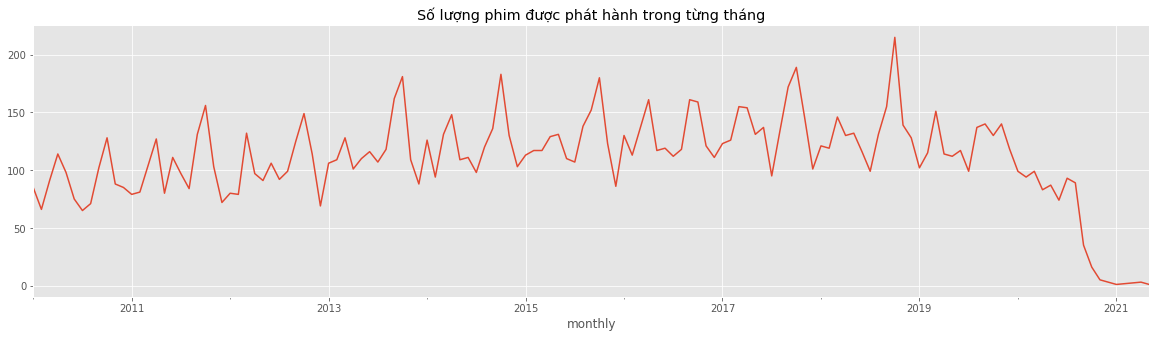

In [56]:
plt.figure(figsize=(20, 5))
q2_df.groupby('monthly').size().plot.line()
plt.title('Số lượng phim được phát hành trong từng tháng')
plt.show()

- Do năm 2019 đến 2020 xảy ra dịch ảnh hưởng rất lớn đến ngành phim ảnh nên khoảng thời gian này sẽ không tuân theo các quy luật thời gian (theo biểu đồ thì có vẻ là có) nên ta sẽ bỏ 2 năm này.

In [57]:
q2_df = q2_df[q2_df.date_published.dt.year<=2018]

- Trước tiên tính tổng các theo từng tháng để có cái nhìn tổng quát

In [58]:
q2_df.groupby('month').size()

month
1      963
2      904
3     1141
4     1161
5      999
6     1001
7      872
8     1013
9     1296
10    1540
11    1073
12     843
dtype: int64

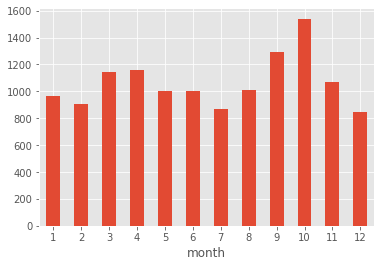

In [59]:
q2_df.groupby('month').size().plot.bar()
plt.xticks(rotation=0)
plt.show()

- Có vẻ khoảng thời gian từ tháng 9 - tháng 10 sẽ có nhiều bộ phim được ra mắt nhất
- Tiếp theo sử dụng `seasonal_decompose` để xác định chu kỳ của số lượng bộ phim được phát hành

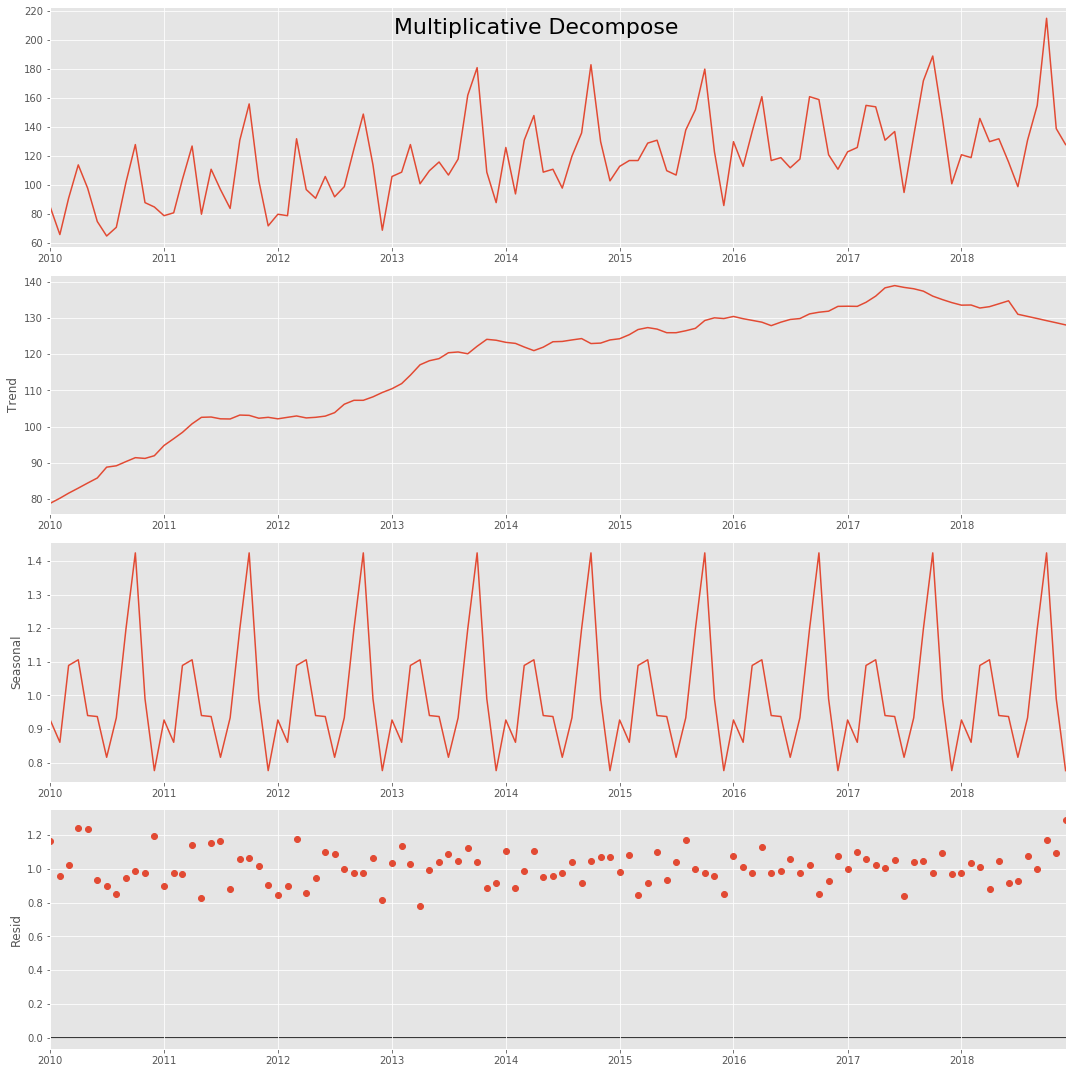

In [60]:
# Lấy số lượng phim được phát hành hàng tháng
df = q2_df.groupby(['monthly']).size()
df.index=df.index.to_timestamp()

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')

# Trực quan kết quả
#plt.rcParams.update({'figure.figsize': (15, 15)})
default_figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (15, 15)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()
plt.rcParams['figure.figsize'] = default_figsize

- Độ nhiễu (`Resid`) đa phần trong khoảng 0.8-1.2 => sự sai lệch không phải là quá nhỏ tuy nhiên với bài toán này thì tương đối chấp nhận được.
- Trực quan rõ hơn `seasonal` (chu kỳ) của số lượng phim

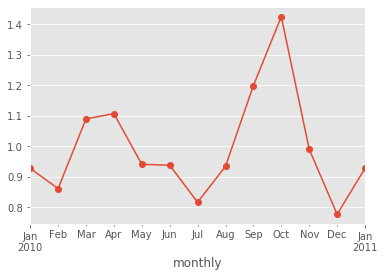

In [61]:
result_mul.seasonal[:13].plot.line(marker='o')
plt.show()

**Vậy có thể rút ra chu kỳ theo năm của số lượng phim được phát hành như sau:**
- Đạt số lượng nhiều nhất vào tháng 10 và ít nhất vào tháng 12
- Sự biến động là khá lớn (chênh lệch giữa min và max là gần gấp đôi (dưới 0.8 so với hơn 1.4))
- Có 2 khoảng thời gian cực đại là khoảng tháng 9 - tháng 10 và khoảng tháng 3 - tháng 4
- Có 2 khoảng cực tiểu là khoảng tháng 6 - tháng 8 và tháng 12

- Khảo sát thử trong tháng 9 - tháng 10 thì ngày nào sẽ có số lượng phim phát hành nhiều nhất 

In [62]:
Sep_Nov_df = q2_df[(q2_df.month == 9) | (q2_df.month == 10)].copy()
Sep_Nov_df['day'] = Sep_Nov_df.date_published.dt.day

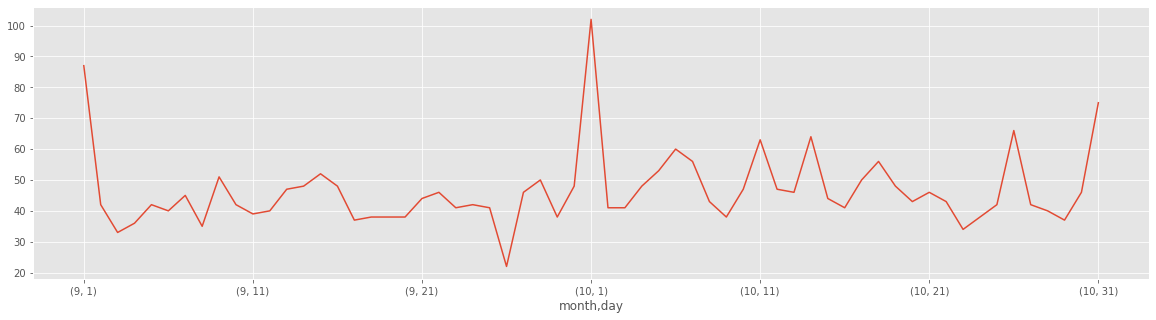

In [63]:
plt.figure(figsize=(20, 5))
Sep_Nov_df.groupby(['month', 'day']).size().plot.line()
plt.show()

- Có vẻ chỉ đơn giản là các nhà sản xuất phim sẽ muốn phát hành vào ngày 1 của tháng (vì nó đẹp và dễ nhớ)

### Thời gian ra mắt phim có mối quan hệ với chất lượng của phim không?

Đã tìm được khoảng thời gian trong năm mà phim được phát hành nhiều. Câu hỏi khác được đặt ra là nếu có nhiều phim thì chất lượng các bộ phim sẽ như thế nào?

Với bộ dữ liệu này thì sẽ đánh giá một cách tương đối chất lượng của phim dựa trên điểm đánh giá ***avg_vote***

Ta sẽ tính trung bình điểm đánh giá theo từng tháng và xác định chu kỳ tương tự như trên đã làm

- Xem thử điểm trung bình của tất cả các bộ phim theo từng tháng

In [64]:
q2_df.groupby('month')['avg_vote'].mean().sort_values()

month
7     5.265940
10    5.310649
1     5.337695
8     5.348371
2     5.358296
5     5.364264
9     5.380710
6     5.381119
11    5.420224
12    5.421708
4     5.444617
3     5.492287
Name: avg_vote, dtype: float64

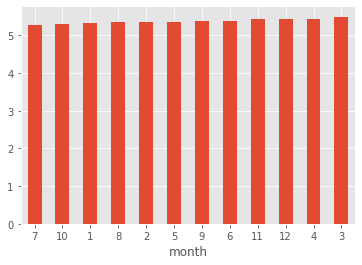

In [65]:
q2_df.groupby('month')['avg_vote'].mean().sort_values().plot.bar()
plt.xticks(rotation=0)
plt.show()

- Trước khi đánh giá thì ta xem thử phân phối điểm đánh giá như thế nào trước đã vì chỉ dựa trên số điểm đánh giá để nói thì sẽ không chính xác

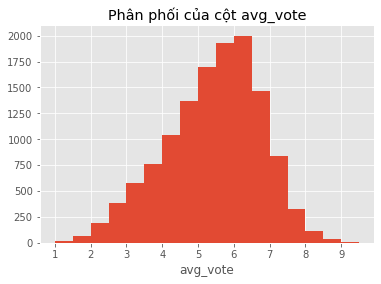

In [66]:
q2_df['avg_vote'].hist(bins=np.arange(1, 10, 0.5))
plt.xticks(np.arange(1, 10))
plt.xlabel('avg_vote')
plt.title('Phân phối của cột avg_vote')
plt.show()

- Dựa trên sự trên lệch và phân phối điểm đánh giá thì có thể nói sự trên lệch điểm đánh giá trung bình giữa các tháng là không đáng kể lắm.
- Tuy nhiên khi nghĩ kỹ hơn thì: Nếu chỉ xét các phim ở top đầu thì như thế nào?

In [67]:
# Lấy giá trị trung bình của 5 giá trị lớn nhất
def top5_mean(s):
    return s.nlargest(5).mean()

In [68]:
top5_mv_monthly = q2_df.groupby('monthly')[['avg_vote']].agg(top5_mean)
top5_mv_monthly['month'] = top5_mv_monthly.index.month
top5_mv_monthly

,avg_vote,month
monthly,,
2010-01,7.66,1
2010-02,7.16,2
2010-03,7.88,3
2010-04,7.56,4
2010-05,7.40,5
...,...,...
2018-08,7.48,8
2018-09,8.00,9
2018-10,7.94,10


- Điểm trung bình của top 5 phim theo từng tháng

In [69]:
top5_mv_monthly.groupby('month')['avg_vote'].mean().sort_values()

month
8     7.537778
6     7.542222
7     7.704444
9     7.711111
5     7.715556
2     7.766667
3     7.773333
4     7.784444
1     7.802222
11    7.857778
10    7.933333
12    7.977778
Name: avg_vote, dtype: float64

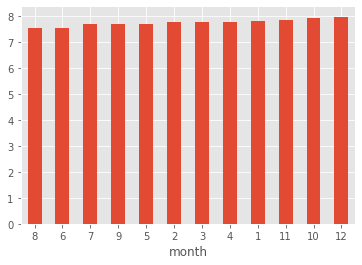

In [70]:
top5_mv_monthly.groupby('month')['avg_vote'].mean().sort_values().plot.bar()
plt.xticks(rotation=0)
plt.show()

- Chênh lệch từ 7.5 lên 8 với phân phối điểm từ 7 trờ lên là khá ít thì độ chênh lệch này có thể xem là nhiều
- Giờ sẽ tiếp tục dùng `seasonal_decompose` để xác định chu kỳ như ở trên

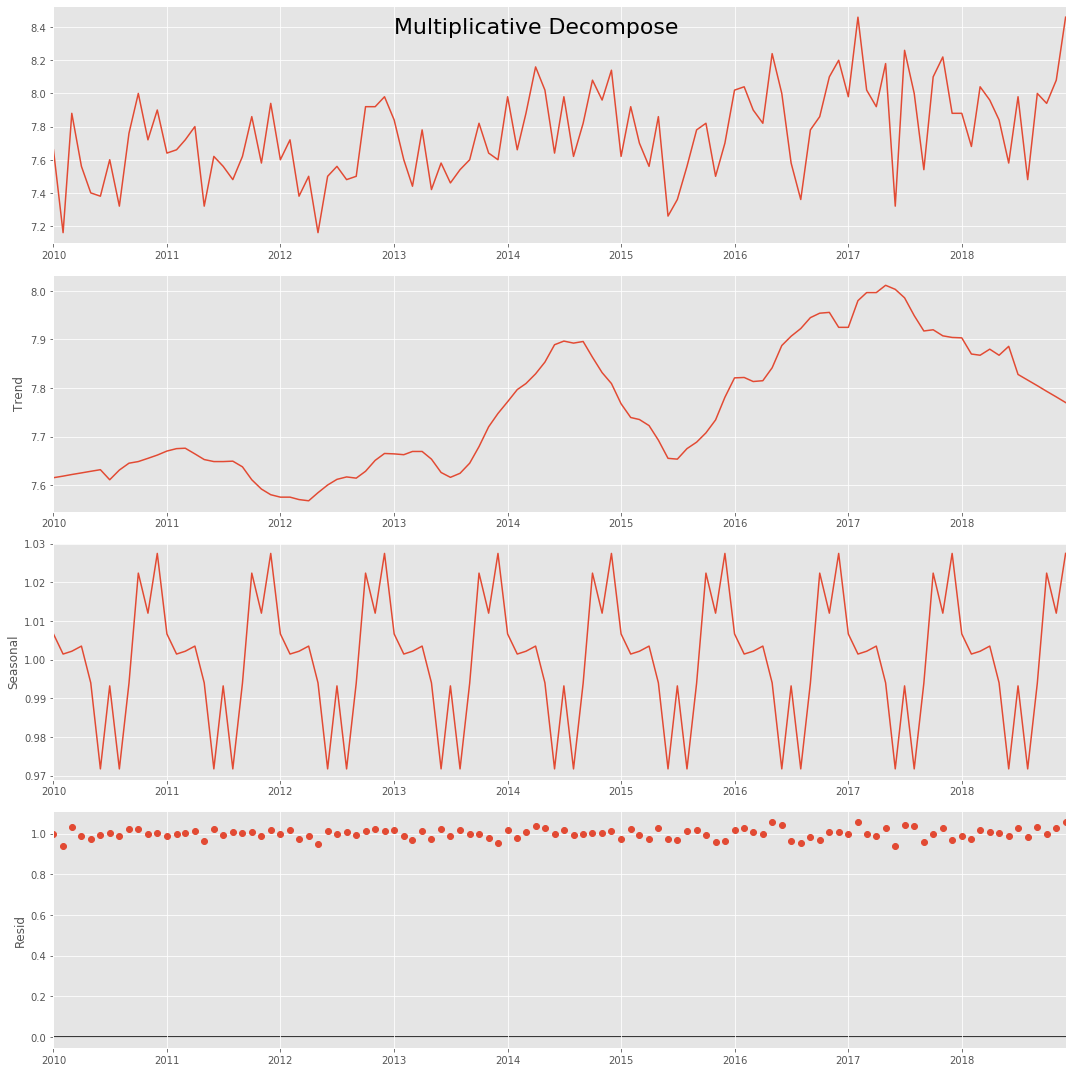

In [71]:
df = top5_mv_monthly[['avg_vote']]
df.index=df.index.to_timestamp()

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')

# Plot
#plt.rcParams.update({'figure.figsize': (15, 15)})
default_figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (15, 15)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()
plt.rcParams['figure.figsize'] = default_figsize

- Độ nhiễu (`Resid`) là rất ít.
- Trực quan rõ hơn `seasonal` (chu kỳ) số điểm đánh giá trung bình

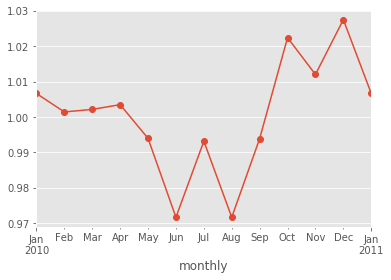

In [72]:
result_mul.seasonal[:13].plot.line(marker='o')
plt.show()

**Vậy có thể rút ra chu kỳ theo năm của điểm trung bình của top 5 phim mỗi tháng như sau:**
- Đạt điểm trung bình vào tháng 12 và ít nhất vào tháng 6
- Sự biến động thì đã nói ở trên
- Khoảng thời gian cực đại là khoảng tháng 10 - tháng 12
- Khoảng thời gian cực tiểu là khoảng tháng 6 và tháng 8

### Tổng kết lại quá trình trả lời câu hỏi:
**Nhắc lại những gì đã thu đươc:**

***Chu kỳ theo năm của số lượng phim được phát hành như sau:***
- Đạt số lượng nhiều nhất vào tháng 10 và ít nhất vào tháng 12
- Sự biến động là khá lớn (chênh lệch giữa min và max là gần gấp đôi (dưới 0.8 so với hơn 1.4)
- Có 2 khoảng thời gian cực đại là khoảng tháng 9 - tháng 10 và khoảng tháng 3 - tháng 4
- Có 2 khoảng cực tiểu là khoảng tháng 6 - tháng 8 và tháng 12
- Các nhà phát hành sẽ thường ra mắt phim vào ngày đầu tiên của tháng

***Chu kỳ theo năm của điểm trung bình của top 5 phim mỗi tháng như sau:***
- Đạt điểm trung bình vào tháng 12 và ít nhất vào tháng 6
- Sự biến động từ 7.5 - 8, khá nhiều nếu dựa phân phối điểm đánh giá (các phim có điểm từ 7 trở lên là không nhiều)
- Khoảng thời gian cực đại là khoảng tháng 10 - tháng 12
- Khoảng thời gian cực tiểu là khoảng tháng 6 - tháng 8

**Tổng kết lại:**
- Tháng 10 có nhiều phim được phát hành hơn hẳn các tháng khác và đồng thời chất lượng phim cũng cao => Nếu muốn xem nhiều phim hay thì nên dành thời gian vào tháng này
- Có một diều đáng lưu ý là tháng 12 tuy có ít phim được phát hành nhất nhưng lại chất lượng phim lại là cao nhất => Nếu thời gian không nhiều thì tháng 12 sẽ là lựa chọn tốt nhất để dành thời gian xem phim
- Khoảng thời gian tháng 6 - tháng 8 thì số lượng phim ít và chất lượng phim cũng thấp hơn các tháng khác => Nếu được thì nên hạn chế xem phim vào khoảng thời gian này

$*$ Các gợi ý trên chỉ mang tính tương đối để có được các gợi ý tốt hơn về thời gian nên dành ra để xem phim thì sẽ phải phụ thuộc vào nhiều yếu tố khác

---

# Nhìn lại quá trình làm đồ án

## Những khó khăn đã gặp phải

### Nam
- Đọc docs không kỹ nên mất thời gian search cách khác :)
- nbdime bị lỗi nên không thể merge được thay git merge, nên phải merge tay

### Minh
- Quá nhiều đề tài và dữ liệu nên hơi khó để đưa ra quyết định chọn dữ liệu nào
- Việc tìm ra câu hỏi có ý nghĩa và không quá dễ để giải quyết cũng là một việc không dễ để giải quyết
- Gặp khó khắn với reviewnb (để so sánh hai file notebook)
- Gặp vài vấn đề nhỏ trong quá trình trực quan hóa

## Những gì đã học được

### Nam
- Ứng dụng lại một vài method của pandas, nhưng kết hợp và sử dụng lại trong vấn đề phức tạp hơn
- Tìm hiểu và sử dụng thêm một số trick và một số method của pandas

### Minh
- Thành thạo hơn về GroupBy objects của pandas, cách trực quan hóa dữ liệu, một số thủ thuật viết markdown
- Biết thêm về cách xử lý dữ liệu datetime và time series decomposition

## Nếu có thêm thời gian:
- Tìm thêm cách khác để version control với notebook
- Tìm hiểu thêm để trực quan dữ liệu tốt hơn
- Tìm thêm các câu hỏi hay (vì dữ liệu có khá nhiều thuộc tính để khai thác)

---

# Tài liệu tham khảo

- 3 file notebook demo pandas của môn Lập trình cho khoa học dữ liệu của thầy Kiên 
- Vài notebook của Kaggle
- [Stackoverflow](https://stackoverflow.com/)
- [Pandas document](https://pandas.pydata.org/docs/)
- https://vi.wikipedia.org/wiki/Internet_Movie_Database